In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt

In [12]:
data=pd.read_csv('diabetes1.csv')

In [13]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [14]:
data.BMI.replace(0, np.median(data.BMI), inplace = True)

In [15]:
data.loc[data['BloodPressure'] == 0, "BloodPressure"]

7      0
15     0
49     0
60     0
78     0
81     0
172    0
193    0
222    0
261    0
266    0
269    0
300    0
332    0
336    0
347    0
357    0
426    0
430    0
435    0
453    0
468    0
484    0
494    0
522    0
533    0
535    0
589    0
601    0
604    0
619    0
643    0
697    0
703    0
706    0
Name: BloodPressure, dtype: int64

In [16]:

data.BloodPressure.replace(0, np.median(data.BloodPressure), inplace = True)

In [17]:
data.loc[data["Insulin"] == 0, "Insulin"]

0      0
1      0
2      0
5      0
7      0
      ..
761    0
762    0
764    0
766    0
767    0
Name: Insulin, Length: 374, dtype: int64

In [18]:

data.Insulin.replace(0, np.median(data.Insulin), inplace = True)

In [19]:
data.loc[data["Insulin"] == 0, "Insulin"]

Series([], Name: Insulin, dtype: float64)

<Axes: xlabel='BloodPressure'>

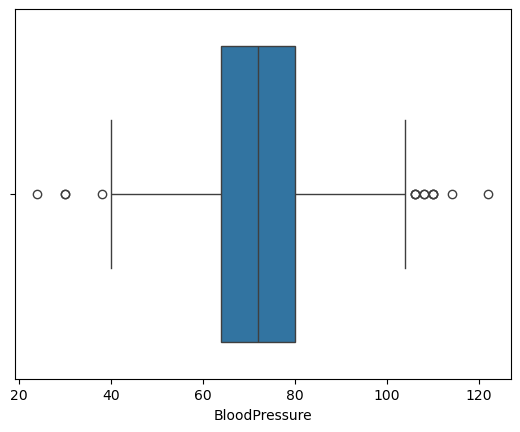

In [20]:
sns.boxplot(x = data.BloodPressure)

In [21]:
q1 = data.BloodPressure.quantile(0.25)
q1

64.0

In [22]:
q3 = data.BloodPressure.quantile(0.75)
q3

80.0

In [23]:
iqr = q3 - q1
iqr

16.0

In [24]:
lb = q1 - 1.5 * iqr
lb

40.0

In [25]:
ub = q3 + 1.5 * iqr
ub

104.0

<Axes: xlabel='BloodPressure'>

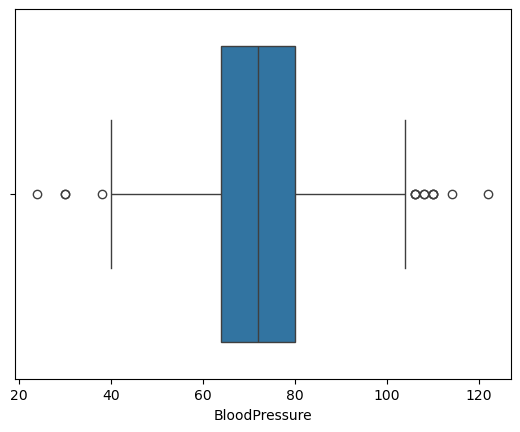

In [26]:
sns.boxplot(x = data.BloodPressure)

In [27]:
data.loc[(data["BloodPressure"] < lb) | (data["BloodPressure"] > ub), "BloodPressure"] = np.median(data.BloodPressure)

In [28]:
# scalling data
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
dl = ['Pregnancies', 'Outcome']
data1 = sc.fit_transform(data.drop(dl, axis = 1))

In [29]:
data1

array([[0.74371859, 0.5       , 0.35353535, ..., 0.31492843, 0.23441503,
        0.48333333],
       [0.42713568, 0.40625   , 0.29292929, ..., 0.17177914, 0.11656704,
        0.16666667],
       [0.91959799, 0.375     , 0.        , ..., 0.10429448, 0.25362938,
        0.18333333],
       ...,
       [0.6080402 , 0.5       , 0.23232323, ..., 0.16359918, 0.07130658,
        0.15      ],
       [0.63316583, 0.3125    , 0.        , ..., 0.24335378, 0.11571307,
        0.43333333],
       [0.46733668, 0.46875   , 0.31313131, ..., 0.24948875, 0.10119556,
        0.03333333]])

In [30]:
con_data = data[["Pregnancies", "Outcome"]]
con_data

,Pregnancies,Outcome
0,6,1
1,1,0
2,8,1
3,1,0
4,0,1
...,...,...
763,10,0
764,2,0
765,5,0
766,1,1


In [31]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [32]:
data2 = pd.DataFrame(data1, columns=['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])

In [33]:
data2

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.743719,0.50000,0.353535,0.019832,0.314928,0.234415,0.483333
1,0.427136,0.40625,0.292929,0.019832,0.171779,0.116567,0.166667
2,0.919598,0.37500,0.000000,0.019832,0.104294,0.253629,0.183333
3,0.447236,0.40625,0.232323,0.096154,0.202454,0.038002,0.000000
4,0.688442,0.00000,0.353535,0.185096,0.509202,0.943638,0.200000
...,...,...,...,...,...,...,...
763,0.507538,0.56250,0.484848,0.199519,0.300613,0.039710,0.700000
764,0.613065,0.46875,0.272727,0.019832,0.380368,0.111870,0.100000
765,0.608040,0.50000,0.232323,0.117788,0.163599,0.071307,0.150000
766,0.633166,0.31250,0.000000,0.019832,0.243354,0.115713,0.433333


In [34]:
final_df = pd.concat([data2, con_data], axis = 1)

In [35]:
final_df

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Pregnancies,Outcome
0,0.743719,0.50000,0.353535,0.019832,0.314928,0.234415,0.483333,6,1
1,0.427136,0.40625,0.292929,0.019832,0.171779,0.116567,0.166667,1,0
2,0.919598,0.37500,0.000000,0.019832,0.104294,0.253629,0.183333,8,1
3,0.447236,0.40625,0.232323,0.096154,0.202454,0.038002,0.000000,1,0
4,0.688442,0.00000,0.353535,0.185096,0.509202,0.943638,0.200000,0,1
...,...,...,...,...,...,...,...,...,...
763,0.507538,0.56250,0.484848,0.199519,0.300613,0.039710,0.700000,10,0
764,0.613065,0.46875,0.272727,0.019832,0.380368,0.111870,0.100000,2,0
765,0.608040,0.50000,0.232323,0.117788,0.163599,0.071307,0.150000,5,0
766,0.633166,0.31250,0.000000,0.019832,0.243354,0.115713,0.433333,1,1


# Model creation

In [36]:
x = final_df.iloc[:,:-1]
y = final_df.Outcome

In [37]:
x

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Pregnancies
0,0.743719,0.50000,0.353535,0.019832,0.314928,0.234415,0.483333,6
1,0.427136,0.40625,0.292929,0.019832,0.171779,0.116567,0.166667,1
2,0.919598,0.37500,0.000000,0.019832,0.104294,0.253629,0.183333,8
3,0.447236,0.40625,0.232323,0.096154,0.202454,0.038002,0.000000,1
4,0.688442,0.00000,0.353535,0.185096,0.509202,0.943638,0.200000,0
...,...,...,...,...,...,...,...,...
763,0.507538,0.56250,0.484848,0.199519,0.300613,0.039710,0.700000,10
764,0.613065,0.46875,0.272727,0.019832,0.380368,0.111870,0.100000,2
765,0.608040,0.50000,0.232323,0.117788,0.163599,0.071307,0.150000,5
766,0.633166,0.31250,0.000000,0.019832,0.243354,0.115713,0.433333,1


In [38]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [39]:
# step 2 - creating, testing and training data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state = 0, test_size = 0.20)

In [40]:
x_train

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Pregnancies
603,0.753769,0.593750,0.292929,0.134615,0.347648,0.262169,0.550000,7
118,0.487437,0.312500,0.232323,0.019832,0.204499,0.155850,0.016667,4
247,0.829146,0.781250,0.333333,0.800481,0.697342,0.149018,0.033333,0
157,0.547739,0.250000,0.212121,0.145433,0.143149,0.322374,0.033333,1
468,0.603015,0.500000,0.000000,0.019832,0.241309,0.044833,0.283333,8
...,...,...,...,...,...,...,...,...
763,0.507538,0.562500,0.484848,0.199519,0.300613,0.039710,0.700000,10
192,0.798995,0.406250,0.000000,0.019832,0.249489,0.130231,0.250000,7
629,0.472362,0.390625,0.222222,0.019832,0.132924,0.029889,0.000000,4
559,0.427136,0.531250,0.000000,0.019832,0.243354,0.094791,0.233333,11


In [41]:
y_train

603    1
118    0
247    0
157    0
468    1
      ..
763    0
192    1
629    0
559    0
684    0
Name: Outcome, Length: 614, dtype: int64

In [42]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(x_train, y_train)

LogisticRegression()

In [43]:
y_pred = clf.predict(x_test)
y_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
      dtype=int64)

In [44]:
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,classification_report,f1_score

In [45]:
confusion_matrix(y_test, y_pred)

array([[101,   6],
       [ 19,  28]], dtype=int64)

In [46]:
recall_score(y_test, y_pred)

0.5957446808510638

In [47]:
precision_score(y_test, y_pred)

0.8235294117647058

In [48]:
f1_score(y_test, y_pred)

0.691358024691358

In [49]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.94      0.89       107
           1       0.82      0.60      0.69        47

    accuracy                           0.84       154
   macro avg       0.83      0.77      0.79       154
weighted avg       0.84      0.84      0.83       154



In [50]:
accuracy_score(y_test, y_pred)

0.8376623376623377

In [51]:
y_test.value_counts()

Outcome
0    107
1     47
Name: count, dtype: int64

In [52]:
a = clf.predict(x_train)
a

array([1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,

In [53]:
accuracy_score(y_train, a)

0.755700325732899

# Multiclass classification

In [58]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,precision_score,accuracy_score,f1_score,recall_score,confusion_matrix

In [59]:
df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/iris.csv')

In [60]:
df

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [61]:
df.Name.value_counts()

Name
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

# Model Create

In [62]:
X = df.iloc[:,:-1]
Y = df.Name

In [63]:
X

,SepalLength,SepalWidth,PetalLength,PetalWidth
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [64]:
Y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Name, Length: 150, dtype: object

In [65]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, random_state=1, test_size=0.20)

In [66]:
lr_multi = LogisticRegression()
lr_multi.fit(X_train, Y_train)


LogisticRegression()

In [67]:
X_test

,SepalLength,SepalWidth,PetalLength,PetalWidth
14,5.8,4.0,1.2,0.2
98,5.1,2.5,3.0,1.1
75,6.6,3.0,4.4,1.4
16,5.4,3.9,1.3,0.4
131,7.9,3.8,6.4,2.0
56,6.3,3.3,4.7,1.6
141,6.9,3.1,5.1,2.3
44,5.1,3.8,1.9,0.4
29,4.7,3.2,1.6,0.2
120,6.9,3.2,5.7,2.3


In [68]:
Y_pred = lr_multi.predict(X_test)
Y_pred

array(['Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [69]:
pd.crosstab(Y_test, Y_pred)

col_0,Iris-setosa,Iris-versicolor,Iris-virginica
Name,,,
Iris-setosa,11,0,0
Iris-versicolor,0,12,1
Iris-virginica,0,0,6


In [70]:
confusion_matrix(Y_test, Y_pred)

array([[11,  0,  0],
       [ 0, 12,  1],
       [ 0,  0,  6]], dtype=int64)

In [71]:
accuracy_score(Y_test, Y_pred)

0.9666666666666667

In [72]:
recall_score(Y_test, Y_pred, average='weighted')

0.9666666666666667

In [73]:
precision_score(Y_test, Y_pred, average='weighted')

0.9714285714285714

In [74]:
f1_score(Y_test, Y_pred,average='weighted')

0.9672820512820512

In [75]:
accuracy_score(Y_test, Y_pred)

0.9666666666666667

In [76]:
print(classification_report(Y_test, Y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.86      1.00      0.92         6

       accuracy                           0.97        30
      macro avg       0.95      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30



In [81]:
output = lr_multi.predict([[1, 2, 3, 4]])
output

array(['Iris-virginica'], dtype=object)

In [77]:
import pickle

# Save the model
with open("logistic_regression_model.pkl", "wb") as file:
    pickle.dump(lr_multi, file)

print("Model saved successfully!")


Model saved successfully!
